# Visualizing Dataset


## Google Drive Settings

In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Colab Notebooks/icdss')

## Data Preprocessing

In [1]:
#importing libraries
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as PathEffects
from reader import get_images
%matplotlib inline

In [2]:
#import dataset
(x_train, y_train), (x_test, y_test) = get_images() 

C:\Users\tansi\Projects\ICDSS-FashionMNIST\reader.py:38: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  x_train = df_train.drop('label', axis=1).as_matrix().astype(np.uint8)
C:\Users\tansi\Projects\ICDSS-FashionMNIST\reader.py:39: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  y_train = df_train['label'].as_matrix().astype(np.uint8)
C:\Users\tansi\Projects\ICDSS-FashionMNIST\reader.py:40: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  x_test = df_test.drop('label', axis=1).as_matrix().astype(np.uint8)
C:\Users\tansi\Projects\ICDSS-FashionMNIST\reader.py:41: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  y_test = df_test['label'].as_matrix().astype(np.uint8)


In [3]:
import seaborn as sns
sns.set_style('darkgrid')
sns.set_palette('muted')
sns.set_context("notebook", font_scale=1.5,
                rc={"lines.linewidth": 2.5})
randomstate = 123

In [4]:
# Utility function to visualize the outputs of t-SNE
# function takes in output from t-sne as a numpy array and colors 
def fashion_scatter(x, colors):
    # choose a color palette with seaborn.
    num_classes = len(np.unique(colors))
    palette = np.array(sns.color_palette("hls", num_classes))

    # create a scatter plot.
    f = plt.figure(figsize=(8, 8))
    ax = plt.subplot(aspect='equal')
    sc = ax.scatter(x[:,0], x[:,1], lw=0, s=40, c=palette[colors.astype(np.int)])
    plt.xlim(-25, 25)
    plt.ylim(-25, 25)
    ax.axis('off')
    ax.axis('tight')

    # add the labels for each digit corresponding to the label
    txts = []

    for i in range(num_classes):

        # Position of each label at median of data points.

        xtext, ytext = np.median(x[colors == i, :], axis=0)
        txt = ax.text(xtext, ytext, str(i), fontsize=24, color = palette[i])
        txt.set_path_effects([
            PathEffects.Stroke(linewidth=5, foreground="w"),
            PathEffects.Normal()])
        txts.append(txt)

    return f, ax, sc, txts

In [7]:
from sklearn.manifold import TSNE
import time
time_start = time.time()

fashion_tsne = TSNE(random_state=randomstate).fit_transform(x_train[0:5000])

print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

t-SNE done! Time elapsed: 161.89509630203247 seconds


(<Figure size 576x576 with 1 Axes>,
 [Text(-40.132034, 11.947703, '0'),
  Text(-4.6535163, 64.41853, '1'),
  Text(-25.232292, -26.768244, '2'),
  Text(-17.534914, 27.729933, '3'),
  Text(-36.207695, -18.871675, '4'),
  Text(36.396378, -4.999115, '5'),
  Text(-22.623745, -8.224395, '6'),
  Text(56.94062, -24.5802, '7'),
  Text(10.28155, -50.63365, '8'),
  Text(45.552433, 22.565351, '9')])

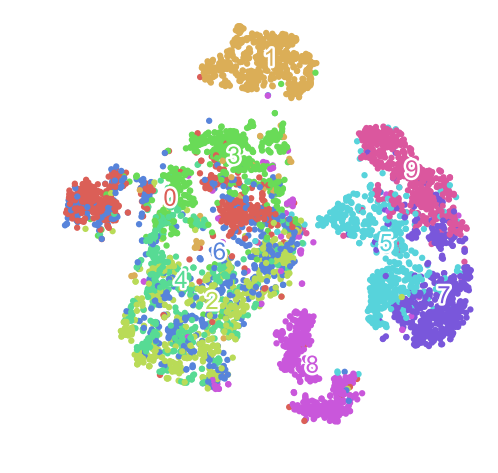

In [8]:
fashion_scatter(fashion_tsne, y_train[0:5000])